In [1]:
import os
import pandas as pd
import scipy.io

final_df = pd.DataFrame()

In [2]:
directory_path = '../pixel'
y2 = []
x2 = []
# Walk through all files and subdirectories in the specified directory
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        # Full path of the file
        file_path = os.path.join(root, file_name)

        if file_path.endswith('.mat') and 'idle' not in file_path and 'MAC' not in file_path:
            try:
                mat_data = scipy.io.loadmat(file_path, mat_dtype=True)
                cols = [i for i in range(1, 1601)]
                df = pd.DataFrame(mat_data['data'], columns = cols)
                df['label'] = 0

                final_df = pd.concat([final_df, df], ignore_index=True)
            except:
                print('File: ' + file_path + ' not processed!')

In [3]:
directory_path = '../idle'

# Walk through all files and subdirectories in the specified directory
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        # Full path of the file
        file_path = os.path.join(root, file_name)

        if file_path.endswith('.mat'):
            try:
                mat_data = scipy.io.loadmat(file_path, mat_dtype=True)
                cols = [i for i in range(1, 1601)]
                df = pd.DataFrame(mat_data['data'], columns = cols)
                df['label'] = 1
                final_df = pd.concat([final_df, df], ignore_index=True)
                # print('File: ' + file_path + '  processed!')

            except:
                print('File: ' + file_path + ' not processed!')

In [4]:
final_df.head()

,1,2,3,4,5,6,7,8,9,10,...,1592,1593,1594,1595,1596,1597,1598,1599,1600,label
0,-90,-90,-90,-90,-89,-90,-90,-90,-90,-90,...,-90,-90,-90,-90,-90,-90,-90,-90,-90,0
1,-91,-92,-92,-92,-92,-92,-91,-92,-92,-91,...,-92,-91,-92,-92,-91,-91,-92,-92,-92,0
2,-89,-90,-90,-89,-79,-89,-89,-89,-89,-89,...,-90,-90,-89,-89,-89,-89,-90,-89,-90,0
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,0
4,-98,-99,-98,-99,-98,-98,-98,-99,-99,-98,...,-99,-98,-99,-99,-98,-99,-99,-98,-99,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_text
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

In [6]:
target_column = 'label'
total = 0

X = final_df.drop(target_column, axis=1)
y = final_df[target_column]


x2 = []
y2 = []
temp = []
temp2 = []

In [7]:
for index, row in X.iterrows():
    for j in row:
        temp.append(j)
    #print(np.array(row))
    #for i in range(1599):
    #    temp.append(row[i+1])
    #temp2.append(np.array(row))
    #temp.clear()
    if index % 16 == 0:
        if len(temp) < 25600:
            m = 0
            temp.clear()
            continue
        x2.append(temp[:])
        temp.clear()

        temp2.clear()
        y2.append(y[index])

In [8]:
len(x2), len(y2)

(199, 199)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [12]:
d_tree = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
d_tree.fit(X_train_resampled, y_train_resampled)
y_pred = d_tree.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


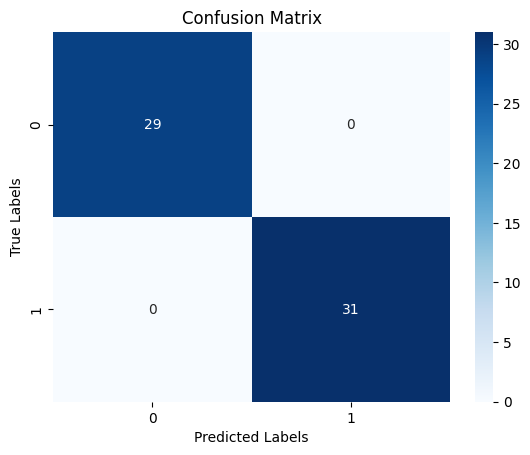

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()